In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms 

from functions import *

from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))


# Cosine noise scheduler test


# Bilinear
## diffusion model trained with bilinear interpolation, epochs = 200, T = 1000 and cosinge scheduler

/Users/corneliusbencsik/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


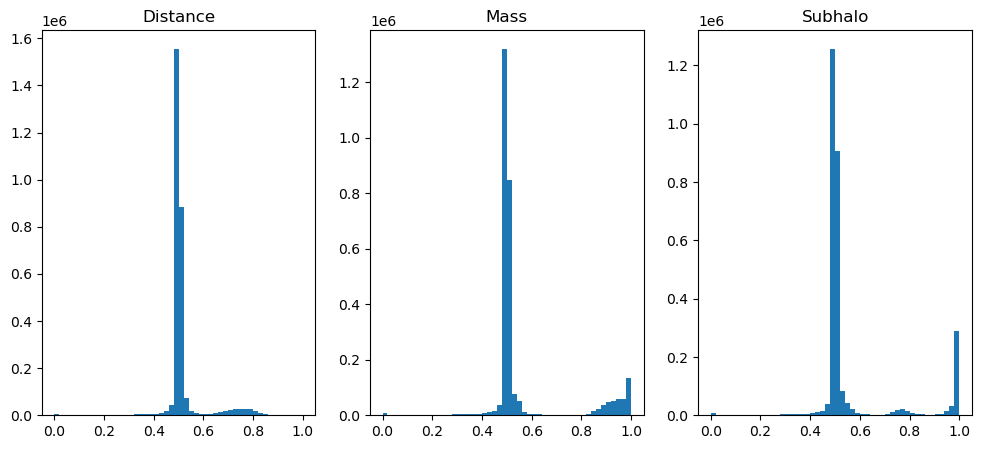

In [2]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')
transform = transforms.Resize((29, 10))

cosine = torch.load("../testing/scheduler/generated_image_BILINEAR_T=1000_cosine.pt", map_location = "cpu")
cosine = transform(cosine.to(dtype=torch.float))
cosine = normalize(cosine, True, [0, 1, 2])


dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [3]:
# dist
print("dist:")
lower_threshold = 0.6
upper_threshold = 0.61
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.65
upper_threshold = 0.8
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.65
upper_threshold = 0.7
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.85
upper_threshold = 0.9
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.6 and 0.61: 0.11%

mass:
Percentage of values between 0.65 and 0.8: 0.40%

subh:
Percentage of values between 0.65 and 0.7: 0.20%

Percentage of values between 0.85 and 0.9: 0.23%



In [4]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.6, m_tresh = 0.8, s_low = 0.7, s_high = 0.9)

full_evaluation(cosine, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 63.53%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 96.71%
inconsistency due to distance not zero in main branch =  15.16%
inconsistency due to gap between branches =  36.77%
inconsistency due to zgap in branch 22.48%
inconsistency due to last descendant dont exist 13.46%

Number of images with two or more inconsistencies = 1540, which is  42.23%
That corresponds to 15.40% of all images


Of all images, 35.27% have zero inconsistency
Of all images, 5.53% have distance main branch inconsistency
Of all images, 13.41% have gap between branches inconsistency
Of all images, 8.20% have gap within branch inconsistency
Of all images, 4.91% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------

# solving shift and compression in generated dat

In [6]:
cosine = torch.load("../testing/scheduler/generated_image_BILINEAR_T=1000_cosine.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
cosine = transform(cosine.to(dtype=torch.float))

In [7]:

# Assuming you have a tensor named 'tensor'
# Convert tensor to 1D if it's not already
tensor_1d = cosine.view(-1)

# Get unique values and their counts
unique_values, counts = torch.unique(torch.round(tensor_1d, decimals = 0), return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")




Value: 0.0, Count: 14042
Value: 1.0, Count: 1585
Value: 2.0, Count: 1463
Value: 3.0, Count: 1329
Value: 4.0, Count: 1560
Value: 5.0, Count: 1015
Value: 6.0, Count: 1088
Value: 7.0, Count: 1432
Value: 8.0, Count: 1105
Value: 9.0, Count: 1301
Value: 10.0, Count: 1018
Value: 11.0, Count: 1197
Value: 12.0, Count: 1278
Value: 13.0, Count: 1189
Value: 14.0, Count: 1034
Value: 15.0, Count: 1554
Value: 16.0, Count: 1005
Value: 17.0, Count: 1142
Value: 18.0, Count: 1033
Value: 19.0, Count: 1013
Value: 20.0, Count: 1438
Value: 21.0, Count: 1040
Value: 22.0, Count: 1600
Value: 23.0, Count: 1095
Value: 24.0, Count: 1269
Value: 25.0, Count: 1526
Value: 26.0, Count: 1561
Value: 27.0, Count: 885
Value: 28.0, Count: 1286
Value: 29.0, Count: 1115
Value: 30.0, Count: 986
Value: 31.0, Count: 1010
Value: 32.0, Count: 826
Value: 33.0, Count: 1068
Value: 34.0, Count: 1030
Value: 35.0, Count: 818
Value: 36.0, Count: 1253
Value: 37.0, Count: 1111
Value: 38.0, Count: 1026
Value: 39.0, Count: 854
Value: 40.0, C

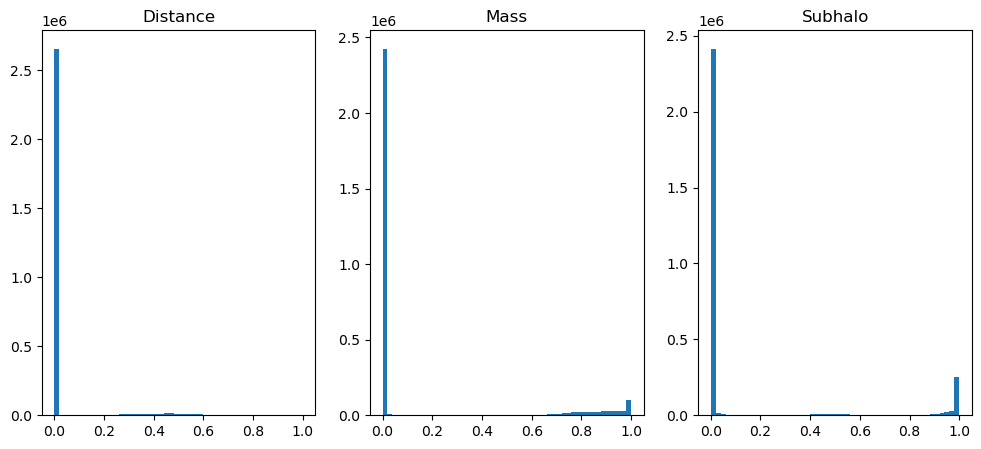

In [8]:
threshold = 140
cosine[cosine < threshold] = threshold

cosine = normalize(cosine, True, [0, 1, 2])

dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [9]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.6
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.2
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.6
upper_threshold = 0.8
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.86%

mass:
Percentage of values between 0.2 and 0.6: 0.54%

subh:
Percentage of values between 0.2 and 0.4: 0.53%

Percentage of values between 0.6 and 0.8: 0.53%



In [10]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.25, m_tresh = 0.6, s_low = 0.3, s_high = 0.77)

full_evaluation(cosine, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 23.37%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 99.20%
inconsistency due to distance not zero in main branch =  5.56%
inconsistency due to gap between branches =  57.21%
inconsistency due to zgap in branch 13.83%
inconsistency due to last descendant dont exist 5.62%

Number of images with two or more inconsistencies = 4741, which is  61.87%
That corresponds to 47.41% of all images


Of all images, 76.02% have zero inconsistency
Of all images, 4.26% have distance main branch inconsistency
Of all images, 43.84% have gap between branches inconsistency
Of all images, 10.60% have gap within branch inconsistency
Of all images, 4.31% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------

# Bicubic
## diffusion model trained with bicubic interpolation, epochs = 200, T = 1000 and cosinge scheduler

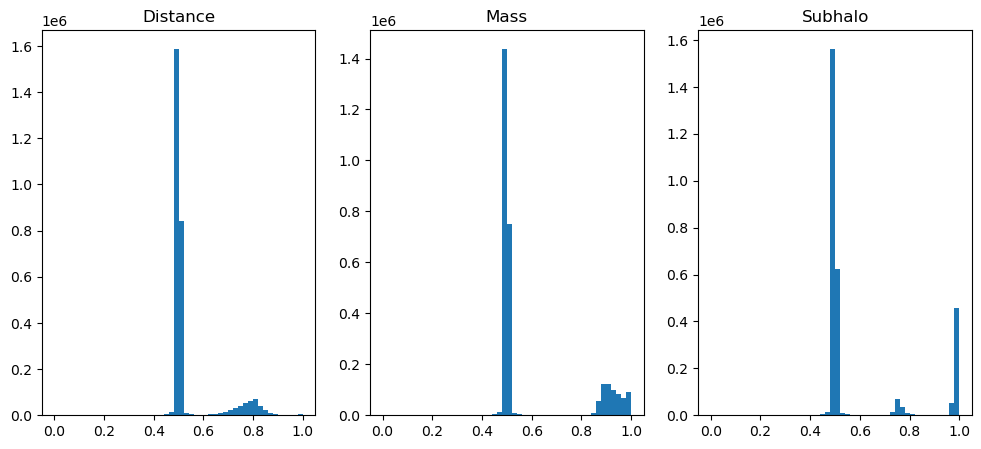

In [11]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')
transform = transforms.Resize((29, 10))

cosine = torch.load("../testing/scheduler/generated_image_BICUBIC_T=1000_cosine.pt", map_location = "cpu")
cosine = transform(cosine.to(dtype=torch.float))
cosine = normalize(cosine, True, [0, 1, 2])


dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [12]:
# dist
print("dist:")
lower_threshold = 0.59
upper_threshold = 0.61
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.65
upper_threshold = 0.8
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.65
upper_threshold = 0.7
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.9
upper_threshold = 0.95
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.59 and 0.61: 0.08%

mass:
Percentage of values between 0.65 and 0.8: 0.15%

subh:
Percentage of values between 0.65 and 0.7: 0.06%

Percentage of values between 0.9 and 0.95: 0.08%



In [13]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.6, m_tresh = 0.8, s_low = 0.7, s_high = 0.92)

full_evaluation(cosine, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 62.66%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 96.97%
inconsistency due to distance not zero in main branch =  4.79%
inconsistency due to gap between branches =  12.96%
inconsistency due to zgap in branch 10.39%
inconsistency due to last descendant dont exist 4.15%

Number of images with two or more inconsistencies = 683, which is  18.29%
That corresponds to 6.83% of all images


Of all images, 36.21% have zero inconsistency
Of all images, 1.79% have distance main branch inconsistency
Of all images, 4.84% have gap between branches inconsistency
Of all images, 3.88% have gap within branch inconsistency
Of all images, 1.55% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
---------------------------------------

In [14]:
cosine = torch.load("../testing/scheduler/generated_image_BICUBIC_T=1000_cosine.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
cosine = transform(cosine.to(dtype=torch.float))
# Assuming you have a tensor named 'tensor'
# Convert tensor to 1D if it's not already
tensor_1d = cosine.view(-1)

# Get unique values and their counts
unique_values, counts = torch.unique(torch.round(tensor_1d, decimals = 0), return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")




Value: 0.0, Count: 4200
Value: 1.0, Count: 178
Value: 2.0, Count: 151
Value: 3.0, Count: 141
Value: 4.0, Count: 131
Value: 5.0, Count: 147
Value: 6.0, Count: 163
Value: 7.0, Count: 163
Value: 8.0, Count: 159
Value: 9.0, Count: 193
Value: 10.0, Count: 163
Value: 11.0, Count: 158
Value: 12.0, Count: 140
Value: 13.0, Count: 148
Value: 14.0, Count: 159
Value: 15.0, Count: 163
Value: 16.0, Count: 164
Value: 17.0, Count: 153
Value: 18.0, Count: 176
Value: 19.0, Count: 135
Value: 20.0, Count: 141
Value: 21.0, Count: 169
Value: 22.0, Count: 167
Value: 23.0, Count: 164
Value: 24.0, Count: 155
Value: 25.0, Count: 149
Value: 26.0, Count: 166
Value: 27.0, Count: 147
Value: 28.0, Count: 173
Value: 29.0, Count: 179
Value: 30.0, Count: 154
Value: 31.0, Count: 208
Value: 32.0, Count: 160
Value: 33.0, Count: 168
Value: 34.0, Count: 190
Value: 35.0, Count: 178
Value: 36.0, Count: 185
Value: 37.0, Count: 174
Value: 38.0, Count: 196
Value: 39.0, Count: 187
Value: 40.0, Count: 180
Value: 41.0, Count: 188
V

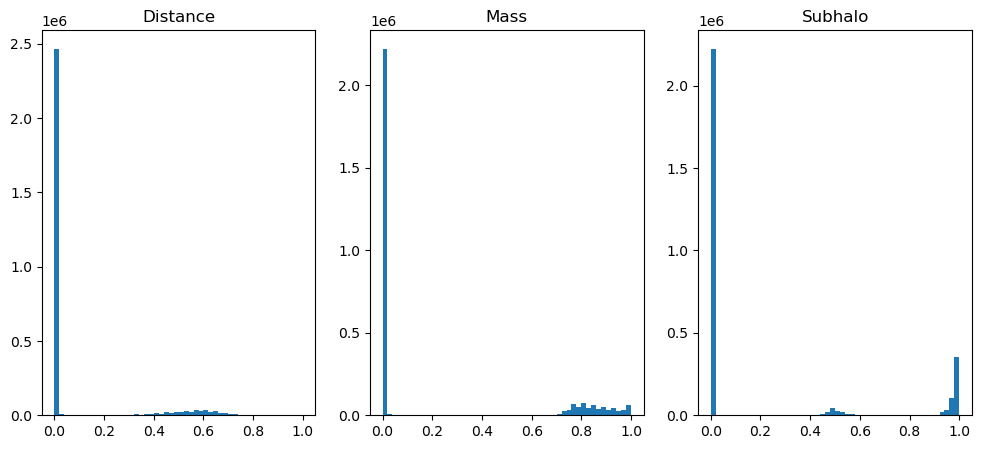

In [15]:
threshold = 130
cosine[cosine < threshold] = threshold

cosine = normalize(cosine, True, [0, 1, 2])

dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [16]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.6
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.2
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.6
upper_threshold = 0.8
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.37%

mass:
Percentage of values between 0.2 and 0.6: 0.23%

subh:
Percentage of values between 0.2 and 0.4: 0.14%

Percentage of values between 0.6 and 0.8: 0.27%



In [17]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.25, m_tresh = 0.6, s_low = 0.3, s_high = 0.77)

full_evaluation(cosine, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 49.85%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 98.29%
inconsistency due to distance not zero in main branch =  3.11%
inconsistency due to gap between branches =  19.14%
inconsistency due to zgap in branch 14.94%
inconsistency due to last descendant dont exist 2.79%

Number of images with two or more inconsistencies = 1508, which is  30.07%
That corresponds to 15.08% of all images


Of all images, 49.29% have zero inconsistency
Of all images, 1.56% have distance main branch inconsistency
Of all images, 9.60% have gap between branches inconsistency
Of all images, 7.49% have gap within branch inconsistency
Of all images, 1.40% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-------------------------------------

In [18]:
cosine[:, 0, :, 0] = 0.0

full_evaluation(cosine, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 49.85%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 98.29%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  19.14%
inconsistency due to zgap in branch 14.94%
inconsistency due to last descendant dont exist 2.79%

Number of images with two or more inconsistencies = 1507, which is  30.05%
That corresponds to 15.07% of all images


Of all images, 49.29% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 9.60% have gap between branches inconsistency
Of all images, 7.49% have gap within branch inconsistency
Of all images, 1.40% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-------------------------------------